# INTRODUCCION A LAS REDES NEURONALES ARTIFICIALES CON KERAS

Los pájaros nos inspiraron para volar, las plantas de bardana inspiraron el velcro e innumerables inventos más se inspiraron en la naturaleza. Parece lógico, entonces, mirar la arquitectura del cerebro en busca de inspiración sobre cómo construir una máquina inteligente. Esta es la idea clave que sirvió de chispa para las *redes neuronales artificiales - RNAs (artificial neuronal networks - ANN)*. Sin embargo, aunque los aviones se inspiraron en los pájaros, no tienen que batir sus alas. De forma similiar, las RNAs se han vuelto gradualmente bastante diferentes de sus primos biológicos. Algunos investigadores incluso argumentan que deberíamos abandonar por completo la analogía biológica (por ejemplo, diciendo "unidades" en lugar de "neuronas"), para que no restrinjamos nuestra creatividad a sistemas biológicamente plausibles (*podemos obtener lo mejor de ambos mundos estando abiertos a inspiraciones biológicas sin temor a crear modelos biológicamente irreales, siempre que funcionen bien*).

Las RNAs son el corazón de Deep Learning. Son versátiles, poderosas y escalables, haciéndolas ideales para abordar tareas grandes y altamente complejas de machine learning, tales como la clasificación de billones de imágenes (por ejemplo, Google Images), potenciar los servicios de reconocimiento del habla (por ejemplo, Siri de Apple), recomendar los mejores videos para ver a cientos de millones de usuarios cada dia (por ejemplo, YouTube) o aprendiendo a vencer al campeón del mundo del juego de *Go* jugando millones de partidas contra sí misma (Alpha-Zero de DeepMind).

En la primera parte de este capítulo, nos introduciremos en las redes neuronales artificiales, empezando por un rapido recorrido por las primera arquitecturas de RNAs, hasta llegar a los *Perceptrones Multi-Capa PMCs* (*Multi-Layer Perceptrons, MLPs*), que se utilizan mucho en la actualidad (en otros capítulos exploraremos otras arquitecturas). En la segunda parte, echaremos un vistazo a cómo implementar RNAs usando la popular API Keras. Se trata de una API de alto nivel maravillosamente diseñada para la construcción, entrenamiento, evaluación y ejecución de redes neuronales. Pero no nos dejemos engañar por su simplicidad: es lo suficientemente expresiva y flexible para construir una amplia variedad de arquitecturas de redes neuronales. De hecho, probablemente será suficiente para la mayoría de nuestros casos. Además, si alguna vez necesitamos flexibilidad extra, siempre podremos escribir componentes de Keras personalizados usando su API de bajo nivel, como veremos más adelante.

Pero primero, retrocedamos en el tiempo para ver cómo surgieron las redes neuronales artificiales.

# De las neuronas biológicas a las artificiales

Sorprendentemente, las RNAs existen desde hace bastante poco: fueron introducidas por primera vez en 1943 por el neurofisiólogo Warren McCulloch y el matemático Walter Pitts. En su [Artículo](https://homl.info/43) “A Logical Calculus of Ideas Immanent in Nervous Activity”, McCulloh y Pitts presentaron un modelo computacional simplificado de cómo las neuronas biológicas podrían trabajar juntas en el cerebro de los animales para ejecutar cálculos complejos usando *lógica proposicional*. Esta fue la primera arquitectura de red neuronal artifical. Desde entonces, se han inventado otras muchas arquitecturas, como veremos.

Los primeros éxitos de las RNAs hasta la década de 1960 llevaron a la creencia generalizada de que pronto estaríamos conversando con máquinas verdaderamente inteligentes. Cuando quedó claro que esa promesa no sería cumplida (al menos durante bastante tiempo), los fondos y la inversión volaron hacia otra parte y las RNAs entraron en un largo invierno. A principio de la década de 1980 se produjo un resurgimiento del interés en el *conexionismo* (el estudio de las redes neuronales), a medida que se inventaron nuevas arquitecturas y se desarrollaron mejores técnicas de entrenamiento. Pero el progreso fue lento y en la década de 1990 se inventaron otras poderosas técnicas de Machine Learning, tales como las Máquinas de Soporte Vectorial. Estas técnicas parecían ofrecer mejores resultados y bases teóricas más solidas que las RNAs, así que una vez más el estudio de las redes neuronales entró en hibernación.

Finalmente, ahora estamos presenciando otra ola de interés en las RNAs. ¿Esta ola se extinguirá como las anteriores? Buieno, exsiten buenas razones para creer que esta ola es diferente y que tendrá un impacto mucho más profundo en nuestras vidas:

+ Ahora existe una enorme cantidad de datos disponibles para entrenar a las redes neuronales y las RNAs superan frecuentemente a otras técnicas de ML en problemas muy grandes y complejos.

+ El tremendo incremento en poder computacional desde la década de 1990 posibilita ahora entrenar grandes redes neuronales en una cantidad de tiempo razonable. Esto es en parte debido a la Ley de Moore, pero también gracias a la industria del juego, que ha producido por millones poderosas tarjetas GPU.

+ Los algoritmos de entrenamiento han sido mejorados. Para ser justos, solo son ligeramente diferentes de los usados en la década de 1990, pero estos pequeños ajustes han tenido un impacto enorme.

+ Algunas limitaciones teóricas de las RNAs han resultado ser benignas en la práctica. Por ejemplo, mucha gente pensó que los algoritmos de entrenamiento estaban condenados porque era probable que se atascaran en óptimos locales, pero resulta que esto es bastante raro en la práctica (o cuando es el caso, generalmente están bastante cerca del óptimo global).

+ Las RNAs parecen haber entrado en un círculo virtuoso de financiación y progreso. Asombrosos productos basados en RNAs aparecen regularmente en las portadas de las noticias, lo que atrae cada vez más la atención y financiación hacia ellos, resultando en más y más progreso e incluso en más productos asombrosos.

## Neuronas biológicas

Antes de que discutamos las neuronas artificiales, echemos un rápido vistazo a las neuronas biológicas (representada en la siguiente figura). Es una célula de aspecto inusual que se encuentra en la corteza cerebral animal (por ejemplo, nuestro cerebro), compuesta por un *cuerpo celular*, conteniendo el núcleo y la mayoría de los componentes complejos de la célula, y muchas extensiones ramificadas denominadas *dendritas*, más una larga extensión llamado *axón*. La longitud del axón puede ser solo un poco más largo que el cuerpo de la célula o hasta decenas de miles de veces más largo. Cerca de su extremidad, el axón se divide en muchas ramas llamadas *telodendritas* y en la punta de esas ramificaciones hay minúsculas estructuras llamadas *terminales sinápticas* (o simplemente *sinapsis*), que están conectadas a las dendritas (o directamente al cuerpo de la célula) de otras neuronas. Las neuronas biológicas reciben impulsos eléctricos cortos llamados *señales* de otras neuronas a través de estas sinapsis. Cuando una neurona recibe un número suficiente de señales de otras neuronas en unos pocos milisegundos, dispara sus propias señales.

![biological_neuron](images/ch10/biological_neuron.png)

Por lo tanto, las neuronas biológicas individuales parecen comportarse de una manera bastante simple, pero están organizadas en un vasta red de billones de neuronas, cada neurona conectada normalmente a miles de otras neuronas. Se pueden realizar cálculos altamente complejos mediante una red de neuronas bastante simples, al igual que un hormiguero puede emerger de los esfuerzos combinados de simples hormigas. La arquitectura de las redes neuronales biológicas (RNB) es todavía objeto de investigación activa, pero se han mapeado algunas partes del cerebro y parece que a menudo las neuronas se organizan en capas consecutivas, como se muestra en la siguiente figura, que representa las múltiples capas de una RNB del córtex humano.

![multiple_layers](images/ch10/multiple_layers.png)

## Cálculos lógicos con neuronas

Warren McCulloch y Walter Pitts propusieron un modelo muy simple de neurona biológica, que posteriormente se conoció como *neurona artificial*: tenía una o mas entradas binarias (on/off) y una salida binaria. La neurona artifical simplemente activa su salida cuando cierto número de sus entradas están activas. MacCulloch y Pitts mostraron que incluso con este modelo simplificado es posible construir una red de neuronas artificiales que pueden calcular cualquier proposición lógica que se quiera. Por ejemplo, construyamos algunas RNAs para ejecutar varios cálculos lógicos (ver siguiente figura), asumiendo que una neurona se activa cuando al menos dos de sus entradas están activas.

![rna_performing](images/ch10/rna_performing.png)

+ La primera red de la izquierda simplemente es la función identidad: si una neurona A está activada, la neurona C también se activa (dado que recibe dos señales de entrada de la neurona A), pero si la neurona A está apagada, la neurona C también está apagada.

+ La segunda red ejecuta un AND lógico: la neurona C está activada solo cuando las neuronas A y B están activadas (una única señal de entrada no es suficiente para activar la neurona C).

+ La tercera red ejecuta un OR lógico: la neurona C se activa si cualquiera de las neuronas A o B está activa (o ambas).

+ Finalmente, si suponemos que una conexión de entrada puede inhibir la actividad de una neurona (como es el caso de las neuronas biológicas), entonces la cuarta red calcula una proposición lógica ligeramente más compleja: la neurona C es activada solo si la neurona A está activada y si la neurona B está apagada. Si la neurona A está activada todo el tiempo, entonces tendremos un NOT lógico: la neurona C está activada cuando la neurona B está apagada, y viceversa.

Podemos imaginar fácilmente cómo podemos combinar estas redes para calcular expresiones lógicas complejas.

## El perceptron

El perceptron es una de las arquitecturas RNA más simples, inventada en 1957 por Frank Rosenblatt. Se basa en una neurona artificial ligeramente diferente (ver la siguiente figura) llamada *unidad lógica de umbral* (*threshold logic unit - TLU*) o algunas veces *unidad de umbral lineal* (*linear threshold unit - LTU*): las entradas y las salidas son ahora números (en lugar de valores binarios on/off) y cada conexión de entrada está asociada con un peso. La TLU calcula una suma ponderada de sus entradas ($z = w_1x_1 + w_2x_2 + \dots + w_nx_n = x^Tw$) y luego aplica una *función de paso* a esta suma y devuelve el resultado: $h_w(x) = \text{step}(z)$, donde $z = x^Tw$.

![TLU](images/ch10/TLU.png)

La función de paso más común usada en los perceptrones es la *función Heaviside*. Algunas veces se usa la función señal en su lugar.

![heaviside](images/ch10/heaviside.png)

Una única TLU se puede usar para clasificación binaria lineal simple. Calcula una combinación lineal de las entradas y si el resultado excede un umbral, devuelve la clase positiva y si no devuelve la clase negativa (como un clasificador de regresión logística o un SVM lineal). Por ejemplo, podemos usar una única TLU para clasificar flores de iris basándonos en la longitud y ancho del pétalo (también añadiendo una característica de sesgo extra $x_0 = 1$, como hicimos en anteriores capítulos). En este caso, entrenar una TLU significa encontrar el valor correcto para $w_0$, $w_1$ y $w_2$.

Un perceptrón se compone simplemente de una única capa de TLUs (*el nombre de perceptron se usa algunas veces para referirse a una red pequeña con una única TLU*), con cada TLU conectada a todas las entradas. Cuando todas las neuronas de una capa están conectadas a cada neurona de la capa previa (es decir, sus neuronas de entrada), es llamada una *capa conectada completamente* o una *capa densa*. Para representar el hecho de que cada entrada se envía a cada TLU, es común dibujar neuronas de paso especiales llamadas *neuronas de entrada*: simplemente emiten cada entrada que se les proporciona. Todas las neuronas de entrada forman la *capa de entrada*. Además, generalmente se añade una característica de sesgo extra ($x_0 = 1$): es normalmente representada usando un tipo especial de neurona llamada *neurona de sesgo*, que solo emite 1 todo el tiempo. Un perceptrón con dos entradas y tres salidas está representado en la siguiente figura. Este perceptrón puede clasificar simultáneamente instancias en tres clases binarias diferentes, lo que lo convierte en una clasificador de múltiples salidas.

![perceptron](images/ch10/perceptron.png)

Gracias a la magia del álgebra lineal es posible calcular eficientemente las salidas de una capa de neuronas artificiales para varias instancias a la vez usando la siguiente ecuación:

$h_{W, b}(X) = \phi(XW + b)$

+ Como siempre, **X** representa la matriz de características de entrada. Tiene una fila por instancia y una columna por característica.

+ La matriz de pesos **W** contiene todas los pesos de conexiones excepto los de la neurona de sesgo. Tiene una fila por neurona de entrada y una columna por neurona artificial en la capa.

+ El vector de sesgo **b** contiene todas los pesos de conexiones entre la neurona de sesgo y las neuronas artificiales. Tiene un término de sesgo por neurona artificial.

+ La función $\phi$ se denomina *función de activación*: cuando las neuronas artificiales son TLUs, es una función de paso.

¿Cómo se entrena un perceptrón? El algoritmo de entrenamiento del perceptrón propuesto por Frank Rosenblatt se inspiró en gran medida en la *regla de Hebb*. En su libro *The organization of behavior*, publicado en 1949, Donald Hebb sugiere que cuando una neurona biológica a menudo activa otra neurona, la conexión entra ambas se fortalece. Esta idea fue posteriormente resumida por Siegrid Löwel en esta frase pegadiza: "Las células que se disparan juntas, se conectan juntas". Esta regla se conoció más tarde como la regla de Hebb (o *aprendizaje hebbiano*); es decir, el peso de conexión entre dos neuronas aumenta siempre que tengan la misma salida. Los perceptrones son entrenados usando una variante de esta regla que tiene en cuenta el error cometido por la red; refuerza las conexiones que ayudan a reducir este error. Más específicamente, el perceptrón recibe una instancia de entrenamiento a la vez y por cada instancia hace sus predicciones. Por cada salida de neurona que produce una predicción errónea, refuerza los pesos de conexión de las entradas que habrían contribuido a la predicción correcta. La regla se muestra en la siguiente ecuación.

$w_{i,j}^{(\text{siguiente paso})} = w_{i, j} + \eta(y_j - \hat{y}_j)x_i$

+ $w_{i,j}$ es el peso de conexión entre la i-ésima neurona de entrada y la j-ésima neurona de salida.

+ $x_i$ es el i-ésimo valor de entrada de la actual instancia de entrenamiento.

+ $\hat{y}_j$ es la salida de la j-ésima neurona de salida de la actual instancia de entrenamiento.

+ $y_j$ es la salido objetivo de la j-ésima neurona de salida de la actual instancia de entrenamiento.

+ $\eta$ es la tasa de aprendizaje.

El límite de decisión de cada neurona de salida es lineal, por tanto los perceptrones son incapaces de patrones complejos de aprendizaje (al igual que los clasificadores de regresión logística). Sin embargo, si las instancias de entrenamiento son linealmente separables, Rosenblatt demostró que este algoritmo convergería a una solución (*tengamos en cuenta que esta solución es generalmente no única: en general cuando los datos son linealmente separables, existe una infinidad de hiperplanos que pueden separarlos*). Esto se denomina *Teorema de convergencia del perceptrón*.

Scikit-Learn suministra una clase `Perceptron` que implementa una única red de TLU. Puede ser usada muy fácilmente como cabría esperar -por ejemplo, en el dataset de iris:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2,3)]  # longitud y ancho de pétalo
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

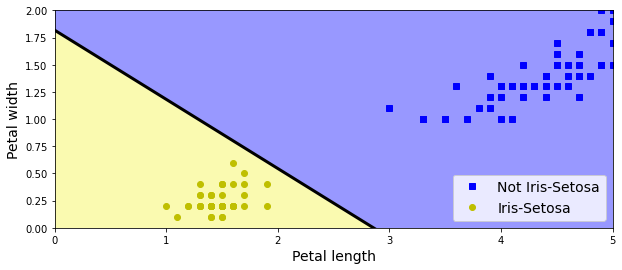

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

Es posible que hayas notado el hecho de que el algoritmo de aprendizaje del perceptrón se parece mucho al Descenso de Gradiente Estocástico. De hecho, la clase `Perceptron` de Scikit-Learn es equivalente a usar un `SGDClassifier` con los siguientes hiperparámetros: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (tasa de aprendizaje) y `penalty=None` (sin regularización).

Tengamos en cuenta que, al contrario que los clasificadores de regresión logística, los perceptrones no devuelve una probabilidad de clase; en su lugar, hacen predicciones basadas en un umbral duro. Esta es una de las buenas razones para preferir la regresión logística sobre los perceptrones.

En su monografía de 1969 titulada *Perceptrones*, Marvin Minsky y Seymour Papert destacaron una serie de graves debilidades de los perceptrones, en particular el hecho de que eran incapaces de solventar problemas triviales (por ejemplo, el problema de clasificación de *OR exclusivo (XOR)*; ver el lado izquierdo de la siguiente figura). Por supuesto, esto también es cierto para cualquier otro modelo de clasificación lineal (como los clasificadores de regresión logística), pero los investigadores esperaban mucho más de los perceptrones y su decepción fue grande, y muchos abandoraron las redes neuronales por completo en favor de problemas de alto nivel como lógica, resolución de problemas y búsqueda.

Sin embargo, resulta que algunas de las limitaciones de los perceptrones pueden eliminarse apilando múltimes perceptrones. La RNA resultante se denomina *Perceptrón Multi-Capa* (*Multi-Layer Perceptron, MLP*). En particular, un MLP puede resolver el problema XOR, como podemos comprobar calculando la salida del MLP representado en la parte derecha de la siguiente figura: con entradas (0, 0) o (1, 1) la red devuelve 0 y con entradas (0, 1) o (1, 0) devuelve 1. Todas las conexiones tienen un peso igual a 1, excepto las cuatro conexiones donde se muestra el peso. 

![xor_mlp](images/ch10/xor_mlp.png)

## Perceptrón Multi-Capa y propagación hacia atrás

Un MLP está compuesto de una *capa de entrada* (de paso), una o más capas de TLUs, llamadas *capas ocultas* y una capa final de TLUs denominada *capa de salida*. Las capas más cercanas a la capa de entrada se llaman normalmente capas inferiores y las más cercanas a la de salida se llaman normalmente capas superiores. Cada capa, excepto la capa de salida, incluyen una neurona de sesgo y están completamente conectadas a la siguiente capa.

![mlp](images/ch10/mlp.png)

---

La señal fluye solo en una única dirección (de las entradas a las salidas), por tanto esta arquitectura es un ejemplo de *red neuronal prealimentada* (*feedforward neural network - FNN*)

---

Cuando una RNA contiene una pila profunda de capas ocultas (*En la década de 1990, una RNA con más de dos capas ocultas se consideraba profunda. Hoy en día es común ver RNA con docenas de capas, o incluso cientos, por lo que la definición de "profundo" es bastante confusa.*), se la denomina *red neural profunda* (*deep neural network - DNN*). El campo del aprendizaje profundo estudia las DNNs y más generalmente modelos conteniendo pilas profundas de cálculos. Sin embargo, muchas personas hablan de Deep Learning cuando se trata de redes neuronales (incluso las superficiales).

Durante muchos años los investigadores lucharon sin éxito por encontrar una forma de entrenar MLPs. Pero en 1986, David Rumelhart, Geoffrey Hinton y Ronald Williams publicaron un [innovador artículo](https://homl.info/44) presentando el algoritmo de entrenamiento de propagación hacia atrás (*backpropagation*), que aún es usado hoy en día. En resumen, es simplemente Descenso de Gradiente utilizando una técnica eficiente para calcular automáticamente los gradientes: en solo dos pasos a través de la red (uno hacia adelante y otro hacia atrás), el algoritmo de propagación hacia atrás es capaz de calcular el gradiente del error de la red con respecto a cada parámetro del modelo. En otras palabras, puede encontrar cómo se debe ajustar cada peso de conexión y cada término de sesgo para reducir el error. Una vez que tiene estos gradientes, ejecuta el paso regular de descenso de gradiente y se repite el proceso completo hasta que la red converge a la solución.

---

El cálculo automático de gradientes se denomina *diferenciación automática* (o *autodiff*). Existen varias técnicas de autodiff, con sus pros y sus contras. Una de ella usada por la propagación hacia atrás se llama *reverse-mode autodiff*. Es rápida y precisa y se adapta bien cuando la función a diferenciar tiene muchas variables (por ejemplo, pesos de conexión) y pocas salidas (por ejemplo, una pérdida).

---

Repasemos este algoritmo con un poco más de detalle:

+ Maneja un mini-lote a la vez (por ejemplo contiene 32 instancias cada uno) y pasa por el conjunto de entrenamiento varias veces. Cada paso se llama *ciclo* (*epoch*), como viemo en el capítulo 4.

+ Cada mini-lote se pasa a la capa de entrada de la red, que simplemente lo envía a la primera capa oculta. Después el algoritmo calcula la salida de todas las neuronas de esta capa (por cada instancia del mini-lote). El resultado se pasa a la siguiente capa, se calcula su salida y se pasa a la siguiente capa y así sucesivamente hasta que obtenemos la salida de la última capa. Es el *paso hacia adelante*: es exactamente como hacer predicciones, excepto que se conservan todos los resultados intermedios dado que son necesarios para el paso hacia atrás.

+ Después, el algoritmo mide el error de salida de la red (es decir, usa una función de pérdida que compara la salida deseada y la salida actual de la red y devuelve alguna medida del error).

+ Entonces calcula cuánto contribuye cada conexión de salida al error. Esto se realiza analíticamente simplemente aplicando la *regla de la cadena* (quizás la regla más fundamental en cálculo), que hace este paso rápido y preciso.

+ El algoritmo entonces mide cuantas de esas contribuciones de error provienen de cada conexión de la capa inferior, usando de nuevo la regla de la cadena -y así sucesivamente hasta que el algotirmo alcanza la capa de entrada. Como se explicó anteriormente, este paso inverso mide eficientemente el gradiente de error en todos los pesos de conexión de la red propagando el gradiente de error hacia atrás a través de la red (de ahí el nombre del algoritmo).

+ Finalmente, el algoritmo ejecuta un paso de descenso de gradiente para ajustar todos los pesos de conexión en la red, usando los gradientes de error recién calculados.

El algoritmo es tan importante que vale la pena resumirlo nuevamente: por cada instancia de entrenamiento el algoritmo de propagación hacia atrás primero hace una predicción (paso hacia adelante), mide el error, después pasa por cada capa en sentido inverso para medir la contribución de error de cada conexión (paso inverso) y finalmente ajusta ligeramente los pesos de conexión para reducir el error (paso de descenso de gradiente).

---

Es importante inicializar aleatoriamente todos los pesos de conexión de las capas ocultas, de lo contrario el entrenamiento fallará. Por ejemplo, si inicializamos todos los pesos y sesgos a cero, entonces todas las neuronas en una capas serán perfectamente idénticas y, por lo tanto, la propagación hacia atrás les afectará exactamente de la misma forma, por lo que permanecerán idénticas. En otras palabras, a pesar de tener cientos de neuronas por capa, nuestro modelo actuará como si solo hubiera una neurona por capa: no será demasiado inteligente. Si, por el contrario, inicializamos aleatoriamente los pesos, *romperemos la simetría* y permitiremos que la propagación hacia atrás entrene un equipo diverso de neuronas.

---

Para que este algoritmo funcione correctamente, los autores realizaron un cambio clave a la arquitectura de MLPs: reemplazaron la función de paso con la función logística, $\sigma = 1/(1 + exp(-z))$. Esto fue esencial porque la función de paso contiene solo segmentos planos, por lo que no hay gradiente con el que trabajar (el descenso de gradiente no puede moverse en una superficie plana), mientras que la función logística tiene una derivada distina de cero bien definida en todas partes, permitiendo al descenso de gradiente progresar en cada paso. De hecho, el algoritmo de propagación hacia atrás funciona bien con muchas otras *funciones de activación*, no solo la función logística. Otras dos populares funciones de activación son:

*La función tangente hiperbólica* $tanh(z) = 2\sigma(2z) - 1$

Al igual que la función logística tiene forma de S, continua y diferenciable, pero su valor de salida varía de -1 a 1 (en lugar de 0 a 1 en el caso de la función logística), lo que tiende a hacer la salida de cada capa más o menos centrada alrededor de 0 al principio del entrenamiento. Esto a menudo ayuda a acelerar la convergencia.

*La función Unidadd Lineal Rectificada: ReLU(z) = max(0, z)*

Es continua pero desafortunadamente no diferenciable en z = 0 (la pendiente cambia abruptamente, lo que puede hacer que el descenso de gradiente rebote alrededor), y su derivada es 0 para z < 0. Sin embargo, en la práctica trabaja muy bien y tiene la ventaja de ser rápida de calcular (*las neuronas biológicas parecen implementar una función de activación aproximadamente sigmoidea, en forma de S, por lo que los investigadores sintieron apego a las funciones sigmoideas durante mucho tiempo. Pero resulta que ReLU generalmente trabaja mejor en RNAs. Este es uno de esos casos donde la analogía fue engañosa*). Más importante aún, el hecho de que no tenga un valor de salida máximo también ayuda a reducir algunos problemas durante el descenso de gradiente.

Estas populares funciones de activación y sus derivadas se representan en la siguiente figura. ¡Pero espera! ¿Por qué necesitamos funciones de activación en primer lugar? Bueno, si encadenamos varias transformaciones lineales, todo lo que obtenemos es una transformación lineal. Por ejemplo, digamos $f(x) = 2x + 3$ y $g(x) = 5x - 1$, luego encadenar estas dos funciones lineales nos da otra función lineal: $f(g(x)) = 2(5x - 1) + 3 = 10x + 1$. Por tanto, si no tenemos algo de no linealidad entre capas, incluso una pila profunda de capas es equivalente a una única capa: no podemos resolver problemas muy complejos con esto.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

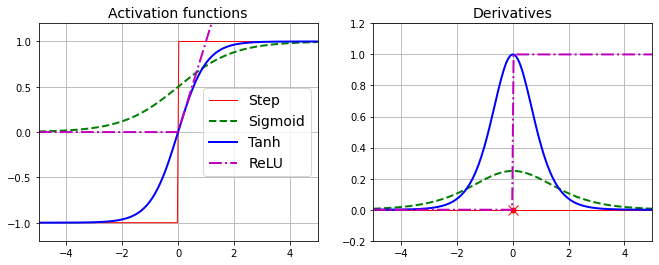

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

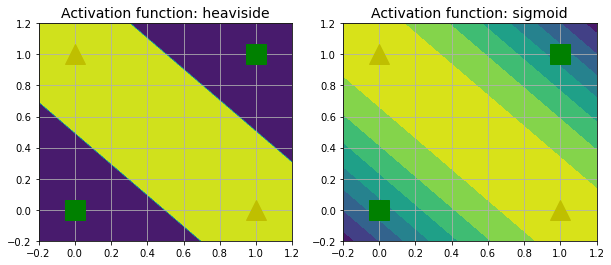

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

¡OK! Ahora que sabemos de dónde vienen las redes neuronales, cuál es su arquitectura y cómo calcular sus salidas, y también hemos aprendido el algoritmo de propagación hacia atrás. Pero, ¿qué podemos hacer exactamente con ellas?

## MLPs de regresión

En primer lugar, los MLPs se pueden usar en tareas de regresión. Si queremos predecir un único valor (por ejemplo, el precio de una vivienda dadas muchas de sus características), entonces solo necesitamos una única neurona de salida: su salida es el valor predicho. Para regresión multivariable (es decir, predecir múltiples valores a la vez), necesitamos una neurona de salida por cada dimensión de salida. Por ejemplo, para localizar el centro de un objeto en una imagen necesitamos predecir coordenadas 2D, por tanto, necesitamos dos neuronas de salida. Si también queremos situar una caja delimitadora alrededor del objeto, necesitaremos dos números más: el ancho y el alto del objeto. Por tanto, terminaremos con 4 neuronas de salida.

En general, cuando construimos un MLP para regresión, no queremos usar ninguna función de activación para las neuronas de salida, por lo que son libres de devolver cualquier rango de valores. Sin embargo, si queremos garantizar que la salida siempre sea positiva, entonces podemos usar la función de activación ReLU o la función de activación *softplus* en la capa de salida. Finalmente, si queremos garantizar que las predicciones caerán dentro de una rango de valores dado, podemos usar la función logística o la tangente hiperbólica, y escalar las etiquetas al rango apropiado: de 0 a 1 para la función logística, de -1 a 1 para la tangente hiperbólica.

Generalmente, la función de pérdida a usar durante el entrenamiento es el error cuadrático medio, pero si tenemos muchos valores atípicos en el conjunto de entrenamiento, podríamos preferir usar el error absoluto medio. Alternativamente, podemos usar la pérdida de Huber, que es una combinación de ambos.

---

La pérdida de Huber es cuadrática cuando el error es más pequeño que un umbral $\delta$ (normalmente 1), pero lineal cuando el error es mayor que $\delta$. Esto lo hace menos sensible a los valores atípicos que el error cuadrático medio y a menudo es más preciso y converge más rápidamente que el error absoluto medio.

---

A continuación, se muestra un resumen de la arquitectura típica de un MLP de regresión.

![regression_mlp](images/ch10/regresion_mlp.png)

## MLPs de clasificación

Los MLPs también pueden usarse en tareas de clasificación. Para un problema de clasificación binaria, solo necesitamos una única neurona de salida usando la función de activación logística: la salida será un número de 0 a 1, que podemos interpretar como la probabilidad estimada de la clase positiva. Obviamente, la probabilidad estimada de la clase negativa es igual a uno menos ese número.

Los MLPs también pueden manejar fácilmente tareas de clasificación binaria multietiqueta. Por ejemplo, podríamos tener un sistema de clasificación de email que predice si cada correo entrante es o no spam y, simultáneamente, predice si se trata de un email urgente o no urgente. En este caso, necesitaríamos dos neuronas de salida, ambas usando la función de activación logística: la primera devolvería la probabilidad de que el email sea spam y la segunda devolvería la probabilidad de que sea urgente. Más genéricamente, dedicaríamos una neurona de salida por cada clase positiva. Tengamos en cuenta que las probabilidades de salida no necesariamente se suman. Esto permite que el modelo devuelva cualquier combinación de etiquetas: podemos tener correo bueno no urgente, bueno urgente, spam no urgente e incluso spam urgente (aunque esto último probablemente sería un error).

Si cada instancia puede pertenecer solo a una única clase, de 3 ó más clases posibles (por ejemplo, clases 0 a 9 para la clasificación de imágenes de dígitos), necesitamos tener una neurona de salida por clase y deberíamos utilizar la función de activación *softmax* para la capa de salida completa. La función softmax (presentada en el capítulo 4) garantiza que todas las probabilidades estimadas se encuentran entre 0 y 1 y que sumen 1 (lo cual es necesario si las clases son exclusivas). Esto se denomina clasificación multiclase.

![mlp_classification](images/ch10/mlp_classification.png)

Con respecto a la función de pérdida, dado que estamos prediciendo distribuciones de probabilidad, la entropía cruzada (también llamada perdida logarítmica, ver capítulo 4) es normalmente una buena elección.

La siguiente tabla resume la arquitectura típica de un MLP de clasificación.

![mlp_classification_arq](images/ch10/mlp_classification_arqu.png)

---

Antes de seguir adelante, recomendamos realizar el ejercicio 1, al final del capítulo. Jugaremos con varias arquitecturas de redes neuronales y visualizaremos sus salidas usando *TensorFlow Playground*. Resultará muy útil para comprender mejor los MLPs, por ejemplo, los efectos de todos los hiperparámetros (número de capas y neuronas, funciones de activación y demás).

---

Ahora tenemos todos los conceptos que necesitamos para empezar implementando MLPs con Keras.

# Implementando MLPs con Keras

Keras es una API de Deep Learning de alto nivel que permite construir, entrenar, evaluar y ejecutar fácilmente todo tipo de redes neuronales. Su documentación (o especificación) está disponible en https://keras.io. La implementación de referencia también se denomina Keras, por lo que para evitar confusiones lo llamaremos keras-team (ya que está disponible en https://github.com/keras-team/keras). Fue desarrollado por François Chollet como parte de un proyecto de investigación (Proyecto ONEIROS - Open-ended Neuro-Electronic Intelligent Robot Operating System) y liberado como proyecto de open source en marzo de 2015. Rápidamente ganó popularidad debido a su facilidad de uso, flexibilidad y bonito diseño. Para ejecutar los cálculos pesados requeridos por las redes neuronales, el equipo de keras se basó en backend de cálculo. En la actualidad, podemos elegir entre tres librerías de deep learning de código abierto: TensorFlow, Microsoft Cognitive Toolkit (CNTK) y Theano.

Además, desde finales de 2016 se han liberado otras implementaciones. Ahora podemos ejecutar Keras en Apache MXNet, Core ML de Apple, Javascript o Typescript (ejecutar código Keras en un navegador web) o PlaidML (que se puede ejecutar en todo tipo de GPUs, no solo Nvidia). Además, TensorFlow ahora viene incluido con su propia implementación de Keras, llamada tf.keras. Solo admite TensorFlow como backend, pero tiene la ventaja de ofrecer algunas características extras muy útiles (ver la siguiente figura): por ejemplo, es compatible con la API de datos de TensorFlow, lo que permite cargar y preprocesar datos de una manera más fácil y eficiente. Por esta razón, usaremos tf.keras en este libro. Sin embargo, en este capítulo no usaremos ninguna de las características específicas de TensorFlow, por lo que el código debería ejecutarse correctamente en cualquier otra implementación de Keras (al menos en Python), con solo modificaciones menores, como cambiar los *import*.

![kear_impl](images/ch10/keras_impl.png)

Como tf.keras está incluido con TensorFlow, instalemos TensorFlow.

---

Para soporte GPU, necesitaremos instalar `tensorflow-gpu` en lugar de `tensorflow`, y existen otras librerías a instalar. Para más detalle, ver https://tensorflow.org/install/gpu.

---

In [10]:
# Vamos a comprobar la versión instalada

import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.3.0'

In [12]:
keras.__version__

'2.4.0'

## Construir un clasificador de imágenes usando la API secuencial

En primer lugar, necesitamos cargar un dataset. Abordaremos el *MNIST Fashion*, que es un reemplazo directo del MNIST. Tiene exactamente el mismo formato que MNIST (70.000 imágenes en escala de grises de 28x28 píxeles cada una, con 10 clases), pero las imágenes representan elementos de moda, en lugar de dígitos escritos a mano, por lo que cada clase es más diversa y el problema resulta significativamente más desafiante que MNIST. Por ejemplo, un modelo lineal simple alcanza aproximadamente un 92% de precisión en MNIST y solo alrededor del 83% en el MNIST Fashion.

### Usando Keras para cargar el dataset

Keras proporciona algunas funciones útiles para cargar datasets comunes, incluyendo MNIST, MNIST Fashion, el dataset original de viviendas de California y más. Carguemos MNIST Fashion:

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Cuando cargamos MNIST o MNIST Fashion usando Keras en lugar de Scikit-Learn, una diferencia importante es que cada imagen está representada como una matriz de 28x28, en lugar de una matriz 1D de tamaño 784. Además, las intensidades de los píxeles están representadas como enteros (de 0 a 255), en lugar de floats (de 0.0 a 255.0). A continuación se muestra el tamaño y el tipo de los datos del conjunto de entrenamiento:

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
y_train_full.dtype

dtype('uint8')

Tengamos en cuenta que el dataset ya está dividido entre conjunto de entrenamiento y conjunto de prueba, pero no existe conjunto de validación, así que lo vamos a crear. Además, dado que vamos a entrenar la red neuronal usando descenso de gradiente, debemos escalar las características de entrada. Por simplicidad, vamos a escalar solo las intensidades de los píxeles al rango 0-1 dividiéndolas por 255.0 (esto también las convierte a floats):

In [18]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Ahora podemos dibujar una imagen usando la función `imshow()` de Matplotlib, con un mapa de color `'binario'`:

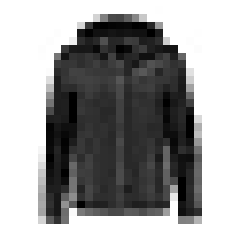

In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Las etiquetas son los IDs de las clases (representados como enteros - uint8), del 0 al 9:

In [21]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Con MNIST, cuando la etiqueta es igual a 5, significa que la imagen representa el dígito 5 escrito a mano. Fácil. Sin embargo, para MNIST Fashion necesitamos listar los nombres de las clases para saber a qué nos estamos refiriendo:

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Por ejemplo, la primera imagen del conjunto de entrenamiento representa un abrigo:

In [22]:
class_names[y_train[0]]

'Coat'

El conjunto de validación contiene 5.000 imágenes y el conjunto de test 10.000 imágenes:

In [23]:
X_valid.shape

(5000, 28, 28)

In [24]:
X_test.shape

(10000, 28, 28)

Echemos un vistazo a un ejemplo de las imágenes del dataset:

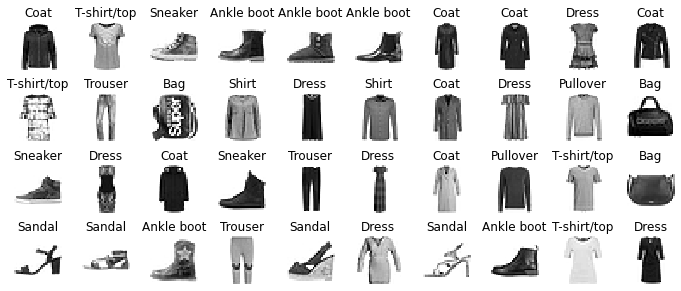

In [25]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creando el modelo usando la API secuencial